In [115]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample

In [116]:
# Imagens
db = pd.read_excel("dados.xlsx")
clas = pd.read_csv("classificacao.csv")

df = pd.concat([db,clas], axis=1).set_index('Caso')

db_0 = df[df['Classificacao'] == 0]
db_1 = df[df['Classificacao'] == 1]

db_1_new = resample(db_1, replace=True, n_samples=19, random_state=123)
db = pd.concat([db_1_new, db_0], axis=0)

X = db.drop(['Classificacao'], axis=1)
Y = db['Classificacao']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y))

In [117]:
clf = RF(n_estimators = 200)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(y_test, y_predict)

[1 0 1 1 0 0 1 0 0 1] [0.98  0.695 0.87  0.885 0.095 0.045 0.885 0.04  0.04  0.985]


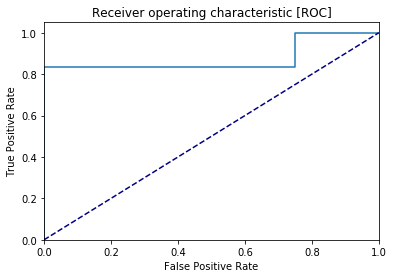

[0.   0.   0.   0.   0.75 0.75 1.  ] [0.         0.16666667 0.5        0.83333333 0.83333333 1.
 1.        ]


In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [ROC]')
plt.show()

print(fpr, tpr)

In [120]:
# Tabela
'''
import datetime

tabela = pd.read_excel('clinicos.xlsx').replace( {'-': np.NaN} )
tabela = tabela.drop([13,14], axis=0)
data_rfa = tabela[['Data RM pré-RFA baseline (DD/MM/AAAA)','Data RFA (DD/MM/AAAA)']]
'''
clf.feature_importances_
#db.keys()

array([0.00251691, 0.00385671, 0.00334104, 0.00280721, 0.00125   ,
       0.00262949, 0.        , 0.00108333, 0.00134615, 0.00974187,
       0.01245584, 0.00631256, 0.06140044, 0.00267946, 0.00200342,
       0.58663132, 0.01696235, 0.00199783, 0.00824444, 0.0026038 ,
       0.00126697, 0.00174355, 0.00315789, 0.00278065, 0.00980891,
       0.00203314, 0.00175   , 0.00254074, 0.00400935, 0.00752935,
       0.00613746, 0.        , 0.01381861, 0.04580069, 0.03910505,
       0.02876869, 0.00133974, 0.        , 0.00066667, 0.        ,
       0.01060075, 0.00208333, 0.0006806 , 0.01354245, 0.00371154,
       0.00325638, 0.00125   , 0.00291022, 0.03573119, 0.0011453 ,
       0.00068627, 0.01003431, 0.00540922, 0.00067308, 0.00500449,
       0.00115919])

In [103]:
date = data_rfa.apply(lambda x: int( (x[1] - x[0]).days ), axis=1)
seg = pd.get_dummies(tabela['Segmento'])
sexo = (tabela['Sexo (M/F)'] == 'M').astype(int)
df_causal = pd.get_dummies(tabela['Fator causal'])
replace_dict = {2: 0}
esp_sin_cir = tabela[['Esplenomegalia  (1. Sim / 2. Não)',
        'Circulação colateral (1. Sim / 2. Não)']].replace(replace_dict)

remove = ['Data RM pré-RFA baseline (DD/MM/AAAA)','Data RFA (DD/MM/AAAA)',
          'Data de nascimento', 'Data da consulta (DD/MM/AAAA)', 'Sexo (M/F)', 
          'Icterícia (1. Sim / 2. Não)','Esplenomegalia  (1. Sim / 2. Não)',
          'Ascite (1. Sim / 2. Não)','Encefalopatia (1. Sim / 2. Não)',
          'Sinais periféricos de hepatopatia crônica (spiders ou eritema palmar) (1. Sim / 2. Não)',
          'Circulação colateral (1. Sim / 2. Não)',
          'Data dos exames (DD/MM/AAAA)', 'Fator causal', 'Segmento', 'Ferritina (ng/mL)','Saturação de ferro (%)', 'Caso']

df_tab = tabela.drop(remove, axis=1) 
df_clean = pd.concat([df_tab, date, seg, sexo, df_causal, esp_sin_cir], axis=1)

for key in df_clean.keys():
    if df_clean[key].isnull().sum() != 0:
        df_clean.loc[df_clean[key].isnull() , key] = df_clean[key].mean()

In [132]:
db_0 = df_clean[df_clean['Classe'] == 0]
db_1 = df_clean[df_clean['Classe'] == 1]

db_1_new = resample(db_1, replace=True, n_samples=19, random_state=123)

db = pd.concat([db_1_new, db_0], axis=0)

X = db.drop(['Classe'], axis=1)
Y = db['Classe']
        
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y))

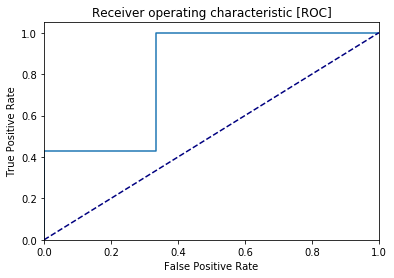

In [133]:
clf = RF(n_estimators = 200)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [ROC]')
plt.show()

In [153]:
dic = {}
for i in range(len(X.keys())):
    key = X.keys()[i]
    dic[key] = clf.feature_importances_[i]
    
dic

{'Idade na data da RFA (anos)': 0.06895467180408374,
 'IMC (Kg/m²)': 0.02884339678284115,
 'Plaquetas (mil/mm3)': 0.014984015224362417,
 'MELD Calculada': 0.014869131785323501,
 'INR': 0.004040415988569821,
 'AP (%)': 0.0050260963612840555,
 'Glicose (mg/dL)': 0.11692880610746884,
 'Uréia (mg/dL)': 0.019045634225827356,
 'Creatinina MELD': 0.0023628200717983995,
 'Creatinina (mg/dL)': 0.019716303635549683,
 'K (mEq/L)': 0.011668670513266017,
 'Na (mEq/L)': 0.007384503528950121,
 'AST (U/L)': 0.02004419054834753,
 'ALT (U/L)': 0.010268225835250723,
 'GGT (U/L)': 0.014639329934344336,
 'FA (U/L)': 0.031395969447224205,
 'BT (mg/dL) - MELD': 0.005042175225915827,
 'BT (mg/dL)': 0.0072853531940864245,
 'BI (mg/dL)': 0.014819719059858627,
 'BD (mg/dL)': 0.020736483171121475,
 'Proteínas totais (g/dL)': 0.007266799107637836,
 'Albumina (g/dL)': 0.008908686896799642,
 'Globulinas (g/dL)': 0.00354213515242927,
 'Colesterol total (mg/dL)': 0.06861782167846647,
 'LDL (mg/dL)': 0.1834881254047357

In [154]:
sum([6.90,
2.88,
1.50,
1.49,
0.40,
0.50,
11.69,
1.90,
0.23,
1.97,
1.18,
0.75,
2.00,
1.04,
1.47,
3.14,
0.50,
0.73,
1.48,
2.07,
0.73,
0.90,
0.35,
6.87,
18.35,
0.27,
2.50,
5.20,
3.77,
0.00,
0.12,
0.00,
0.18,
0.00,
0.00,
0.15,
0.00,
0.86,
4.73,
0.20,
1.99,
0.33,
0.13,
0.24,
0.11,
3.75,
0.47,
0.67,
3.25])



99.93999999999998